
## **Customer Churn Prediction using Gradient Boosting Classifier**

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score


**Load and Prepare Data**

In [2]:
# Load the dataset
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [4]:
# Select features and target
X = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = data['Exited']

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Initialize and Train Gradient Boosting Classifier**

In [7]:
# Initialize GradientBoostingClassifier
grad_boost = GradientBoostingClassifier(random_state=42)

In [8]:
# Train Gradient Boosting Classifier
grad_boost.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

**Evaluate Gradient Boosting Classifier and Compute Metrics**

In [9]:
# Predict on test data
grad_boost_preds = grad_boost.predict(X_test)
# Calculate accuracy
grad_boost_acc = accuracy_score(y_test, grad_boost_preds)
# Generate classification report
grad_boost_report = classification_report(y_test, grad_boost_preds)
# Generate confusion matrix
grad_boost_cm = confusion_matrix(y_test, grad_boost_preds)

In [10]:
# Compute ROC curve and AUC
grad_boost_prob = grad_boost.predict_proba(X_test)[:, 1]
grad_boost_fpr, grad_boost_tpr, _ = roc_curve(y_test, grad_boost_prob)
grad_boost_roc_auc = roc_auc_score(y_test, grad_boost_prob)

**Print Evaluation Metrics**

In [11]:
# Print results
print("\nGradient Boosting Accuracy: {:.2f}%".format(grad_boost_acc * 100))
print("Gradient Boosting Report:\n", grad_boost_report)


Gradient Boosting Accuracy: 86.60%
Gradient Boosting Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



**Plot ROC Curve and Confusion Matrix**

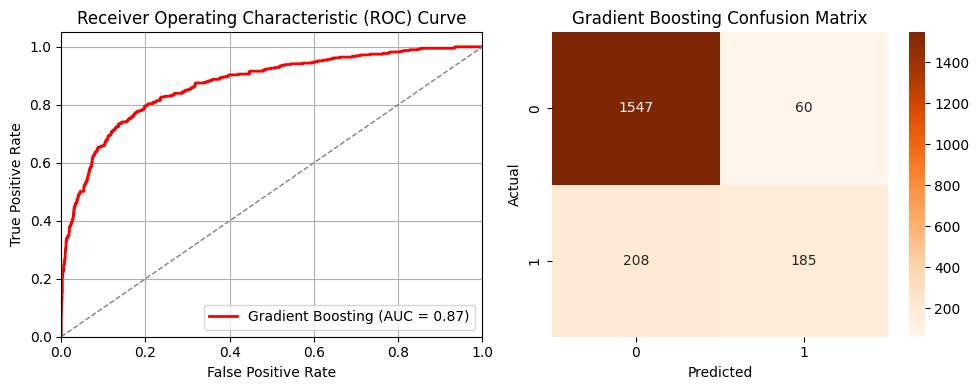

In [12]:
# Plot ROC Curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(grad_boost_fpr, grad_boost_tpr, color='red', lw=2, label=f'Gradient Boosting (AUC = {grad_boost_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Plot Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(grad_boost_cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()